# Homework 11 - Transfer Learning (Domain Adversarial Training)

> Author: Arvin Liu (r09922071@ntu.edu.tw)

If there are any questions, please contact mlta-2022-spring@googlegroups.com

# Readme

In homework 11, you will need to implement Domain Adversarial Training in Transfer Learning. As shown in the bottom left part of the figure.

<img src="https://i.imgur.com/iMVIxCH.png" width="500px">

> 

## Scenario and Why Domain Adversarial Training
Now we have labeled source data and unlabeled target data, where source data might be relavent to the target data. We now want to train a model with source data only and test it on target data.

What problem might occur if we do so? After we have learned Anomaly Detection, we now know that if we test the model with an abnormal data that have never appeared in source data, our trained model is likely to result in poor performance since it is not familiar with the abnormal data.

For example, we have a model that contains Feature Extractor and Classifier:
<img src="https://i.imgur.com/IL0PxCY.png" width="500px">

When the model is trained with source data, the feature extractor 
will extract meaningful features since it is familiar with the distribution of it.It could be seen in the following figure that the blue dots, which is the distribution of source data, has already been clustered into different clusters. Therefore, the Classifier can predict the label based on these clusters.

However, when test on the target data, the Feature Extractor will not be able to extract meaningful features that follow the distribution of the source feature distribution, which result in the classifier learned for the source domain will not be able to apply to the target domain.


## Domain Adversarial Training of Nerural Networks (DaNN)

Based on the above problems, DaNN approaches build mappings between the source (training-time) and the target (test-time) domains, so that the classifier learned for the source domain can also be applied to the target domain, when composed with the learned mapping between domains.

<img src="https://i.imgur.com/vrOE5a6.png" width="500px">

In DaNN, the authors added a Domain Classifier, which is a deep discriminatively-trained classifeir in the training framework to distinguish the data from different domain by the features extracted by the feature extractor. As the training progresses, the approach promotes a domain classifier that discriminates between the source and the target domains and a feature extractor that can extractor features that are discriminative for the main learning task on the source domain and indiscriminate with respect to the shift between the domains. 


The feature extractor are likely to outperform the domain classifier as its input are generated by the feature extractor and that the task of domain classification and label classification are not conflict.

This method leads to the emergence of features that are domain-invariant and on the same feature distribution.

# Data Introduce

Our task contains source data: real photos, and target data: hand-drawn graffiti.

We are going to train the model with the photos and the labels, and try to predict what the labels are for hand-drawn graffiti.

The data could be downloaded [here](https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip). The code below is for data downloading and visualization.

Note that: **The source and target data are all balanced data, you can make use of this information.**

In [ ]:
# Download dataset
!wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.0/real_or_drawing.zip" -O real_or_drawing.zip

# Download from mirrored dataset link
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.1/real_or_drawing.zip" -O real_or_drawing.zip
# !wget "https://github.com/redxouls/ml2020spring-hw11-dataset/releases/download/v1.0.2/real_or_drawing.zip" -O real_or_drawing.zip

# Unzip the files
!unzip real_or_drawing.zip

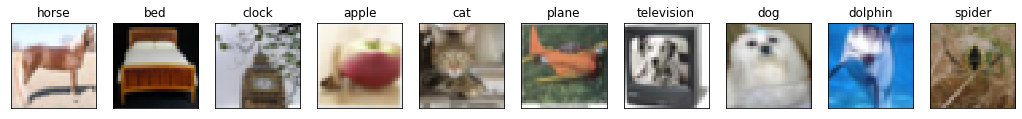

In [1]:
import matplotlib.pyplot as plt

def no_axis_show(img, title='', cmap=None):
    # imshow, and set the interpolation mode to be "nearest"。
    fig = plt.imshow(img, interpolation='nearest', cmap=cmap)
    # do not show the axes in the images.
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(title)
titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))
for i in range(10):
    plt.subplot(1, 10, i+1)
    fig = no_axis_show(plt.imread(f'real_or_drawing/train_data/{i}/{500*i}.bmp'), title=titles[i])


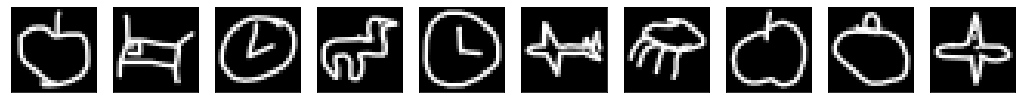

In [2]:
plt.figure(figsize=(18, 18))
for i in range(10):
    plt.subplot(1, 10, i+1)
    fig = no_axis_show(plt.imread(f'real_or_drawing/test_data/0/' + str(i).rjust(5, '0') + '.bmp'))

# Special Domain Knowledge

When we graffiti, we usually draw the outline only, therefore we can perform edge detection processing on the source data to make it more similar to the target data.


## Canny Edge Detection
The implementation of Canny Edge Detection is as follow.
The algorithm will not be describe thoroughly here.  If you are interested, please refer to the wiki or [here](https://medium.com/@pomelyu5199/canny-edge-detector-%E5%AF%A6%E4%BD%9C-opencv-f7d1a0a57d19).

We only need two parameters to implement Canny Edge Detection with CV2:  `low_threshold` and `high_threshold`.

```cv2.Canny(image, low_threshold, high_threshold)```

Simply put, when the edge value exceeds the high_threshold, we determine it as an edge. If the edge value is only above low_threshold, we will then determine whether it is an edge or not.

Let's implement it on the source data.

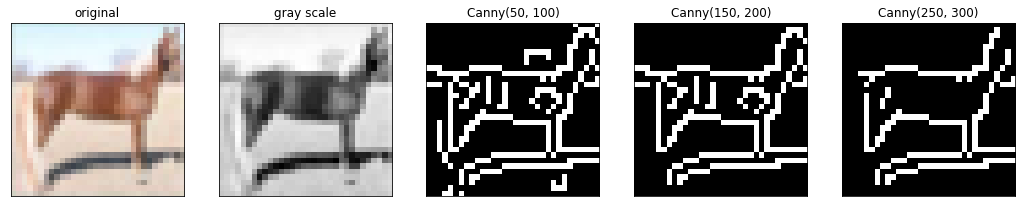

In [3]:
import cv2
import matplotlib.pyplot as plt
titles = ['horse', 'bed', 'clock', 'apple', 'cat', 'plane', 'television', 'dog', 'dolphin', 'spider']
plt.figure(figsize=(18, 18))

original_img = plt.imread(f'real_or_drawing/train_data/0/0.bmp')
plt.subplot(1, 5, 1)
no_axis_show(original_img, title='original')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 2)
no_axis_show(gray_img, title='gray scale', cmap='gray')

canny_50100 = cv2.Canny(gray_img, 50, 100)
plt.subplot(1, 5, 3)
no_axis_show(canny_50100, title='Canny(50, 100)', cmap='gray')

canny_150200 = cv2.Canny(gray_img, 150, 200)
plt.subplot(1, 5, 4)
no_axis_show(canny_150200, title='Canny(150, 200)', cmap='gray')

canny_250300 = cv2.Canny(gray_img, 250, 300)
plt.subplot(1, 5, 5)
no_axis_show(canny_250300, title='Canny(250, 300)', cmap='gray')
  

# Data Process
 
 
The data is suitible for `torchvision.ImageFolder`. You can create a dataset with `torchvision.ImageFolder`. Details for image augmentation please refer to the comments in the following codes.

In [4]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
 
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
 
source_transform = transforms.Compose([
    # Turn RGB to grayscale. (Bacause Canny do not support RGB images.)
    transforms.Grayscale(),
    # cv2 do not support skimage.Image, so we transform it to np.array, 
    # and then adopt cv2.Canny algorithm.
    transforms.Lambda(lambda x: cv2.Canny(np.array(x), 170, 300)),
    # Transform np.array back to the skimage.Image.
    transforms.ToPILImage(),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
target_transform = transforms.Compose([
    # Turn RGB to grayscale.
    transforms.Grayscale(),
    # Resize: size of source data is 32x32, thus we need to 
    #  enlarge the size of target data from 28x28 to 32x32。
    transforms.Resize((32, 32)),
    # 50% Horizontal Flip. (For Augmentation)
    transforms.RandomHorizontalFlip(),
    # Rotate +- 15 degrees. (For Augmentation), and filled with zero 
    # if there's empty pixel after rotation.
    transforms.RandomRotation(15, fill=(0,)),
    # Transform to tensor for model inputs.
    transforms.ToTensor(),
])
 
source_dataset = ImageFolder('real_or_drawing/train_data', transform=source_transform)
target_dataset = ImageFolder('real_or_drawing/test_data', transform=target_transform)
 
source_dataloader = DataLoader(source_dataset, batch_size=32, shuffle=True)
target_dataloader = DataLoader(target_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(target_dataset, batch_size=128, shuffle=False)

In [5]:
def same_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Random seed
# seed = np.random.randint(0, 2**31, size=1)[0]

# My seed
seed = 2044576553
print(seed)
same_seeds(seed)

2044576553


# Model

Feature Extractor: Classic VGG-like architecture

Label Predictor / Domain Classifier: Linear models.

In [6]:
class FeatureExtractor(nn.Module):

    def __init__(self):
        super(FeatureExtractor, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
    def forward(self, x):
        x = self.conv(x).squeeze()
        return x

class LabelPredictor(nn.Module):

    def __init__(self):
        super(LabelPredictor, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 10),
        )

    def forward(self, h):
        c = self.layer(h)
        return c

class DomainClassifier(nn.Module):

    def __init__(self):
        super(DomainClassifier, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),

            nn.Linear(512, 1),
        )

    def forward(self, h):
        y = self.layer(h)
        return y

### Configuration

In [7]:
# learning_rate = 1e-4

total_epochs = 3000
n_balanced = 100
n_save = 500

early_stage_epoch = 1
middle_stage_epoch = total_epochs // 2
final_stage_epoch = total_epochs

model_dir = f"./models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

extractor_path = os.path.join(model_dir, f"extractor_model.pt")
predictor_path = os.path.join(model_dir, f"predictor_model.pt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pre-processing

Here we use Adam as our optimizor.

In [8]:
feature_extractor = FeatureExtractor().to(device)
label_predictor = LabelPredictor().to(device)
domain_classifier = DomainClassifier().to(device)

class_criterion = nn.CrossEntropyLoss()
domain_criterion = nn.BCEWithLogitsLoss()

optimizer_F = optim.Adam(feature_extractor.parameters())
optimizer_C = optim.Adam(label_predictor.parameters())
optimizer_D = optim.Adam(domain_classifier.parameters())
# scheduler_F = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_F, T_max=1000)
# scheduler_C = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_C, T_max=1000)
# scheduler_D = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_D, T_max=1000)

# Start Training


## DaNN Implementation

In the original paper, Gradient Reversal Layer is used.
Feature Extractor, Label Predictor, and Domain Classifier are all trained at the same time. In this code, we train Domain Classifier first, and then train our Feature Extractor (same concept as Generator and Discriminator training process in GAN).

## Reminder
* Lambda, which controls the domain adversarial loss, is adaptive in the original paper. You can refer to [the original work](https://arxiv.org/pdf/1505.07818.pdf) . Here lambda is set to 0.1.
* We do not have the label to target data, you can only evaluate your model by uploading your result to kaggle.:)

In [9]:
def train_epoch(source_dataloader, target_dataloader, lamb):
    '''
        Args:
        source_dataloader: source data的dataloader
        target_dataloader: target data的dataloader
        lamb: control the balance of domain adaptatoin and classification.
    '''
    # D loss: Domain Classifier's loss
    # F loss: Feature Extrator's & Label Predictor's loss
    running_D_loss, running_F_loss = 0.0, 0.0
    total_hit, total_num = 0.0, 0.0
    domain_hit, domain_num = 0.0, 0.0

    for i, ((source_data, source_label), (target_data, _)) in enumerate(zip(source_dataloader, target_dataloader)):

        source_data = source_data.to(device)
        source_label = source_label.to(device)
        target_data = target_data.to(device)
        
        # Mixed the source data and target data, or it'll mislead the running params
        #   of batch_norm. (runnning mean/var of soucre and target data are different.)
        mixed_data = torch.cat([source_data, target_data], dim=0)
        domain_label = torch.zeros([source_data.shape[0] + target_data.shape[0], 1]).to(device)
        # set domain label of source data to be 1.
        domain_label[:source_data.shape[0]] = 1

        # Step 1 : train domain classifier
        feature = feature_extractor(mixed_data)
        # We don't need to train feature extractor in step 1.
        # Thus we detach the feature neuron to avoid backpropgation.
        domain_logits = domain_classifier(feature.detach())
        loss = domain_criterion(domain_logits, domain_label)
        running_D_loss += loss.item()
        loss.backward()
        optimizer_D.step()
        # scheduler_D.step()

        domain_logits = torch.round(torch.sigmoid(domain_logits))
        domain_hit += (domain_logits == domain_label).sum().float().item()
        domain_num += domain_label.shape[0]

        # Step 2 : train feature extractor and label classifier
        class_logits = label_predictor(feature[:source_data.shape[0]])
        domain_logits = domain_classifier(feature)
        # loss = cross entropy of classification - lamb * domain binary cross entropy.
        #  The reason why using subtraction is similar to generator loss in disciminator of GAN
        loss = class_criterion(class_logits, source_label) - lamb * domain_criterion(domain_logits, domain_label)
        running_F_loss += loss.item()
        loss.backward()
        optimizer_F.step()
        # scheduler_F.step()
        optimizer_C.step()
        # scheduler_C.step()

        optimizer_D.zero_grad()
        optimizer_F.zero_grad()
        optimizer_C.zero_grad()

        total_hit += torch.sum(torch.argmax(class_logits, dim=1) == source_label).item()
        total_num += source_data.shape[0]
        print(i, end='\r')

    return running_D_loss / (i+1), running_F_loss / (i+1), total_hit / total_num, domain_hit / domain_num

In [10]:
# Smaller Standard Deviation performs better.
def is_balanced(preds, num_classes=10):
    assert preds.shape[0] == len(test_dataloader.dataset), "Prediction size doesn't match dataset size."
    classes_distribution = {}
    for i in range(num_classes):
        classes_distribution[i] = (preds == i).sum() / len(test_dataloader.dataset) * 100
    std = np.std(list(classes_distribution.values()))
    return std, classes_distribution

def bar_plot(classes_distribution):
    fig = plt.figure(figsize=(6, 4))
    x = list(classes_distribution.keys())
    y = list(classes_distribution.values())

    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, y, color='blue')
    plt.xlabel("Class")
    plt.ylabel("Propotional(%)")
    plt.xticks(x_pos, x)
    plt.show()
    plt.close()

## Training

In [11]:
# Ref: https://arxiv.org/abs/1505.07818
# In the paper, gamma is set to 10.
def get_lambda(epoch, total_epochs, gamma=10):
    p = epoch / total_epochs
    return 2. / (1 + np.exp(-gamma * p)) - 1.

### Training Statisticals

In [12]:
checkpoints = {
    'Epoch': [],
    'lambda': [],
    'Training Accuracy': [],
    'Domain Training Accuracy': [],
    'Extractor Loss': [],
    'Domain Classifier Loss': [],
}

epoch   1: train D loss: 0.2099, train F loss: 1.9118, train acc: 0.2946, domain acc: 0.9229
epoch   2: train D loss: 0.2777, train F loss: 1.6135, train acc: 0.4250, domain acc: 0.8904
epoch   3: train D loss: 0.2349, train F loss: 1.4785, train acc: 0.4826, domain acc: 0.9026
epoch   4: train D loss: 0.2064, train F loss: 1.3923, train acc: 0.5090, domain acc: 0.9164
epoch   5: train D loss: 0.1964, train F loss: 1.3398, train acc: 0.5310, domain acc: 0.9245
epoch   6: train D loss: 0.2155, train F loss: 1.2948, train acc: 0.5392, domain acc: 0.9152
epoch   7: train D loss: 0.2461, train F loss: 1.2560, train acc: 0.5600, domain acc: 0.8995
epoch   8: train D loss: 0.2405, train F loss: 1.2220, train acc: 0.5854, domain acc: 0.9055
epoch   9: train D loss: 0.2244, train F loss: 1.1828, train acc: 0.5836, domain acc: 0.9100
epoch  10: train D loss: 0.2139, train F loss: 1.1352, train acc: 0.6000, domain acc: 0.9174
epoch  11: train D loss: 0.2018, train F loss: 1.1090, train acc: 0.60

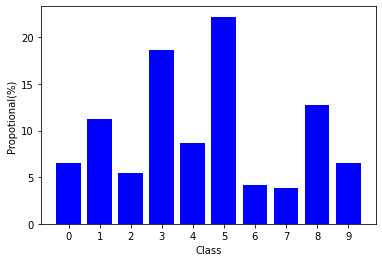

epoch 101: train D loss: 0.4184, train F loss: 0.0247, train acc: 0.9712, domain acc: 0.8074
epoch 102: train D loss: 0.4246, train F loss: 0.0419, train acc: 0.9654, domain acc: 0.8008
epoch 103: train D loss: 0.4234, train F loss: 0.0458, train acc: 0.9632, domain acc: 0.8033
epoch 104: train D loss: 0.4184, train F loss: 0.0246, train acc: 0.9680, domain acc: 0.8065
epoch 105: train D loss: 0.4211, train F loss: 0.0203, train acc: 0.9702, domain acc: 0.8033
epoch 106: train D loss: 0.4417, train F loss: 0.0213, train acc: 0.9688, domain acc: 0.7937
epoch 107: train D loss: 0.4368, train F loss: 0.0181, train acc: 0.9692, domain acc: 0.7904
epoch 108: train D loss: 0.4278, train F loss: 0.0233, train acc: 0.9674, domain acc: 0.7938
epoch 109: train D loss: 0.4334, train F loss: 0.0453, train acc: 0.9624, domain acc: 0.7956
epoch 110: train D loss: 0.4445, train F loss: 0.0124, train acc: 0.9716, domain acc: 0.7907
epoch 111: train D loss: 0.4346, train F loss: 0.0278, train acc: 0.96

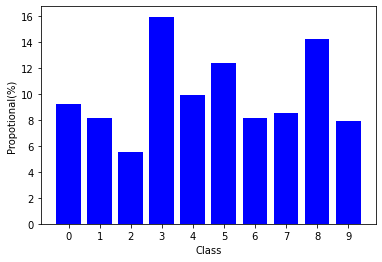

epoch 201: train D loss: 0.5617, train F loss: -0.1098, train acc: 0.9782, domain acc: 0.7049
epoch 202: train D loss: 0.5631, train F loss: -0.0979, train acc: 0.9738, domain acc: 0.7020
epoch 203: train D loss: 0.5522, train F loss: -0.1141, train acc: 0.9826, domain acc: 0.7144
epoch 204: train D loss: 0.5663, train F loss: -0.1141, train acc: 0.9800, domain acc: 0.6984
epoch 205: train D loss: 0.5629, train F loss: -0.1093, train acc: 0.9772, domain acc: 0.7089
epoch 206: train D loss: 0.5620, train F loss: -0.1107, train acc: 0.9762, domain acc: 0.7078
epoch 207: train D loss: 0.5527, train F loss: -0.1075, train acc: 0.9802, domain acc: 0.7165
epoch 208: train D loss: 0.5612, train F loss: -0.1106, train acc: 0.9784, domain acc: 0.7134
epoch 209: train D loss: 0.5525, train F loss: -0.1189, train acc: 0.9828, domain acc: 0.7174
epoch 210: train D loss: 0.5608, train F loss: -0.1088, train acc: 0.9780, domain acc: 0.6999
epoch 211: train D loss: 0.5663, train F loss: -0.1327, trai

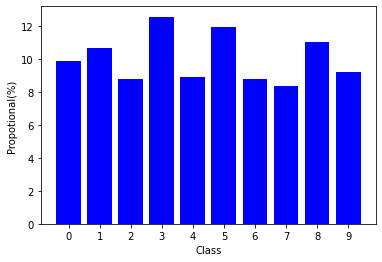

epoch 301: train D loss: 0.6088, train F loss: -0.2080, train acc: 0.9806, domain acc: 0.6727
epoch 302: train D loss: 0.6086, train F loss: -0.2206, train acc: 0.9834, domain acc: 0.6678
epoch 303: train D loss: 0.5982, train F loss: -0.2155, train acc: 0.9818, domain acc: 0.6742
epoch 304: train D loss: 0.6047, train F loss: -0.2144, train acc: 0.9830, domain acc: 0.6678
epoch 305: train D loss: 0.6168, train F loss: -0.2303, train acc: 0.9850, domain acc: 0.6552
epoch 306: train D loss: 0.6104, train F loss: -0.2165, train acc: 0.9824, domain acc: 0.6686
epoch 307: train D loss: 0.6133, train F loss: -0.2198, train acc: 0.9790, domain acc: 0.6625
epoch 308: train D loss: 0.6210, train F loss: -0.2341, train acc: 0.9824, domain acc: 0.6418
epoch 309: train D loss: 0.6224, train F loss: -0.2236, train acc: 0.9802, domain acc: 0.6520
epoch 310: train D loss: 0.6194, train F loss: -0.2353, train acc: 0.9820, domain acc: 0.6482
epoch 311: train D loss: 0.6158, train F loss: -0.2362, trai

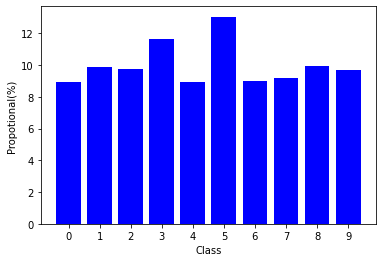

epoch 401: train D loss: 0.6340, train F loss: -0.3166, train acc: 0.9852, domain acc: 0.6365
epoch 402: train D loss: 0.6327, train F loss: -0.3064, train acc: 0.9860, domain acc: 0.6333
epoch 403: train D loss: 0.6382, train F loss: -0.3171, train acc: 0.9848, domain acc: 0.6366
epoch 404: train D loss: 0.6449, train F loss: -0.3248, train acc: 0.9840, domain acc: 0.6279
epoch 405: train D loss: 0.6429, train F loss: -0.3299, train acc: 0.9886, domain acc: 0.6283
epoch 406: train D loss: 0.6370, train F loss: -0.3302, train acc: 0.9894, domain acc: 0.6346
epoch 407: train D loss: 0.6433, train F loss: -0.3173, train acc: 0.9842, domain acc: 0.6293
epoch 408: train D loss: 0.6343, train F loss: -0.3110, train acc: 0.9810, domain acc: 0.6398
epoch 409: train D loss: 0.6438, train F loss: -0.3232, train acc: 0.9840, domain acc: 0.6157
epoch 410: train D loss: 0.6347, train F loss: -0.3276, train acc: 0.9860, domain acc: 0.6337
epoch 411: train D loss: 0.6410, train F loss: -0.3274, trai

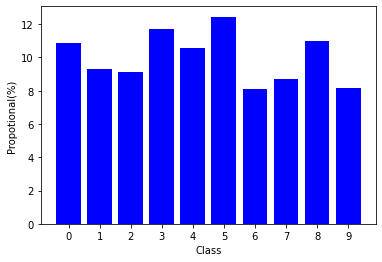

epoch 501: train D loss: 0.6440, train F loss: -0.3864, train acc: 0.9848, domain acc: 0.6227
epoch 502: train D loss: 0.6459, train F loss: -0.3850, train acc: 0.9846, domain acc: 0.6190
epoch 503: train D loss: 0.6447, train F loss: -0.3937, train acc: 0.9876, domain acc: 0.6252
epoch 504: train D loss: 0.6536, train F loss: -0.4046, train acc: 0.9888, domain acc: 0.6119
epoch 505: train D loss: 0.6510, train F loss: -0.4019, train acc: 0.9888, domain acc: 0.6148
epoch 506: train D loss: 0.6520, train F loss: -0.4073, train acc: 0.9886, domain acc: 0.6127
epoch 507: train D loss: 0.6539, train F loss: -0.3885, train acc: 0.9820, domain acc: 0.6072
epoch 508: train D loss: 0.6468, train F loss: -0.3916, train acc: 0.9858, domain acc: 0.6222
epoch 509: train D loss: 0.6495, train F loss: -0.3956, train acc: 0.9850, domain acc: 0.6233
epoch 510: train D loss: 0.6410, train F loss: -0.3924, train acc: 0.9862, domain acc: 0.6243
epoch 511: train D loss: 0.6561, train F loss: -0.4078, trai

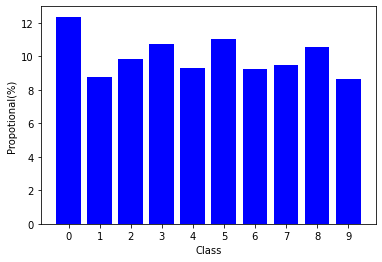

epoch 601: train D loss: 0.6549, train F loss: -0.4527, train acc: 0.9884, domain acc: 0.6100
epoch 602: train D loss: 0.6557, train F loss: -0.4501, train acc: 0.9890, domain acc: 0.6090
epoch 603: train D loss: 0.6516, train F loss: -0.4356, train acc: 0.9860, domain acc: 0.6132
epoch 604: train D loss: 0.6493, train F loss: -0.4544, train acc: 0.9888, domain acc: 0.6162
epoch 605: train D loss: 0.6514, train F loss: -0.4490, train acc: 0.9872, domain acc: 0.6123
epoch 606: train D loss: 0.6625, train F loss: -0.4651, train acc: 0.9882, domain acc: 0.5978
epoch 607: train D loss: 0.6583, train F loss: -0.4587, train acc: 0.9892, domain acc: 0.6025
epoch 608: train D loss: 0.6557, train F loss: -0.4520, train acc: 0.9874, domain acc: 0.6029
epoch 609: train D loss: 0.6579, train F loss: -0.4653, train acc: 0.9910, domain acc: 0.6000
epoch 610: train D loss: 0.6590, train F loss: -0.4675, train acc: 0.9900, domain acc: 0.6040
epoch 611: train D loss: 0.6587, train F loss: -0.4575, trai

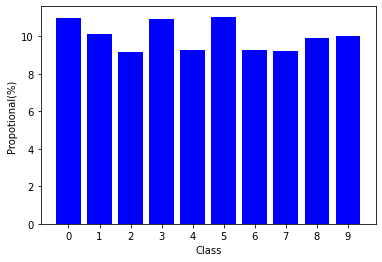

epoch 701: train D loss: 0.6674, train F loss: -0.4958, train acc: 0.9874, domain acc: 0.5905
epoch 702: train D loss: 0.6587, train F loss: -0.5099, train acc: 0.9912, domain acc: 0.6016
epoch 703: train D loss: 0.6553, train F loss: -0.4888, train acc: 0.9870, domain acc: 0.6102
epoch 704: train D loss: 0.6622, train F loss: -0.4993, train acc: 0.9898, domain acc: 0.5941
epoch 705: train D loss: 0.6592, train F loss: -0.4949, train acc: 0.9870, domain acc: 0.5964
epoch 706: train D loss: 0.6604, train F loss: -0.5059, train acc: 0.9884, domain acc: 0.6019
epoch 707: train D loss: 0.6621, train F loss: -0.4957, train acc: 0.9876, domain acc: 0.5987
epoch 708: train D loss: 0.6589, train F loss: -0.5007, train acc: 0.9884, domain acc: 0.6004
epoch 709: train D loss: 0.6622, train F loss: -0.5123, train acc: 0.9914, domain acc: 0.5958
epoch 710: train D loss: 0.6602, train F loss: -0.4970, train acc: 0.9884, domain acc: 0.5972
epoch 711: train D loss: 0.6558, train F loss: -0.5024, trai

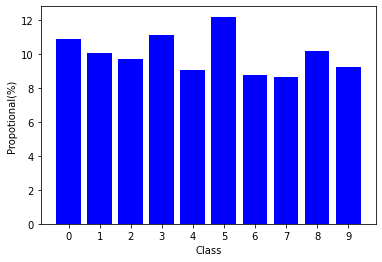

epoch 801: train D loss: 0.6653, train F loss: -0.5414, train acc: 0.9890, domain acc: 0.5954
epoch 802: train D loss: 0.6663, train F loss: -0.5445, train acc: 0.9910, domain acc: 0.5948
epoch 803: train D loss: 0.6638, train F loss: -0.5391, train acc: 0.9922, domain acc: 0.5934
epoch 804: train D loss: 0.6667, train F loss: -0.5389, train acc: 0.9880, domain acc: 0.5868
epoch 805: train D loss: 0.6673, train F loss: -0.5371, train acc: 0.9888, domain acc: 0.5895
epoch 806: train D loss: 0.6663, train F loss: -0.5374, train acc: 0.9874, domain acc: 0.5933
epoch 807: train D loss: 0.6688, train F loss: -0.5292, train acc: 0.9880, domain acc: 0.5912
epoch 808: train D loss: 0.6619, train F loss: -0.5293, train acc: 0.9896, domain acc: 0.5992
epoch 809: train D loss: 0.6689, train F loss: -0.5435, train acc: 0.9882, domain acc: 0.5861
epoch 810: train D loss: 0.6616, train F loss: -0.5385, train acc: 0.9904, domain acc: 0.6007
epoch 811: train D loss: 0.6629, train F loss: -0.5243, trai

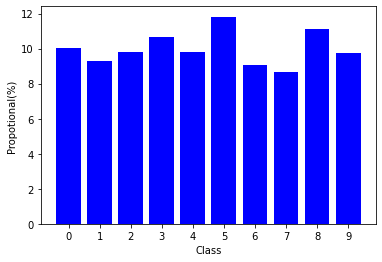

epoch 901: train D loss: 0.6658, train F loss: -0.5600, train acc: 0.9876, domain acc: 0.5935
epoch 902: train D loss: 0.6721, train F loss: -0.5627, train acc: 0.9884, domain acc: 0.5835
epoch 903: train D loss: 0.6718, train F loss: -0.5631, train acc: 0.9896, domain acc: 0.5818
epoch 904: train D loss: 0.6671, train F loss: -0.5654, train acc: 0.9896, domain acc: 0.5867
epoch 905: train D loss: 0.6681, train F loss: -0.5578, train acc: 0.9892, domain acc: 0.5817
epoch 906: train D loss: 0.6655, train F loss: -0.5650, train acc: 0.9902, domain acc: 0.5927
epoch 907: train D loss: 0.6654, train F loss: -0.5684, train acc: 0.9918, domain acc: 0.5933
epoch 908: train D loss: 0.6679, train F loss: -0.5646, train acc: 0.9892, domain acc: 0.5829
epoch 909: train D loss: 0.6748, train F loss: -0.5805, train acc: 0.9920, domain acc: 0.5748
epoch 910: train D loss: 0.6745, train F loss: -0.5619, train acc: 0.9878, domain acc: 0.5733
epoch 911: train D loss: 0.6687, train F loss: -0.5679, trai

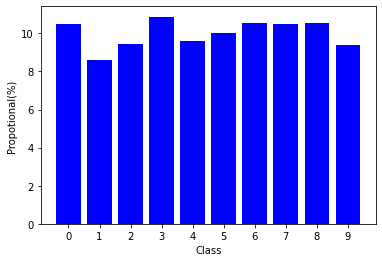

epoch 1001: train D loss: 0.6664, train F loss: -0.5760, train acc: 0.9898, domain acc: 0.5924
epoch 1002: train D loss: 0.6705, train F loss: -0.5953, train acc: 0.9926, domain acc: 0.5841
epoch 1003: train D loss: 0.6727, train F loss: -0.5903, train acc: 0.9908, domain acc: 0.5793
epoch 1004: train D loss: 0.6727, train F loss: -0.5888, train acc: 0.9894, domain acc: 0.5768
epoch 1005: train D loss: 0.6696, train F loss: -0.5769, train acc: 0.9872, domain acc: 0.5875
epoch 1006: train D loss: 0.6687, train F loss: -0.5844, train acc: 0.9900, domain acc: 0.5881
epoch 1007: train D loss: 0.6641, train F loss: -0.5822, train acc: 0.9916, domain acc: 0.5960
epoch 1008: train D loss: 0.6676, train F loss: -0.5869, train acc: 0.9922, domain acc: 0.5890
epoch 1009: train D loss: 0.6729, train F loss: -0.5916, train acc: 0.9904, domain acc: 0.5806
epoch 1010: train D loss: 0.6731, train F loss: -0.5885, train acc: 0.9914, domain acc: 0.5737
epoch 1011: train D loss: 0.6733, train F loss: -0

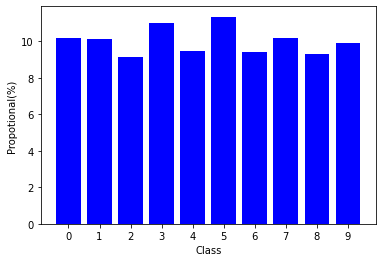

epoch 1101: train D loss: 0.6705, train F loss: -0.6016, train acc: 0.9912, domain acc: 0.5816
epoch 1102: train D loss: 0.6718, train F loss: -0.6010, train acc: 0.9902, domain acc: 0.5807
epoch 1103: train D loss: 0.6702, train F loss: -0.5977, train acc: 0.9880, domain acc: 0.5883
epoch 1104: train D loss: 0.6672, train F loss: -0.6035, train acc: 0.9910, domain acc: 0.5931
epoch 1105: train D loss: 0.6753, train F loss: -0.6081, train acc: 0.9912, domain acc: 0.5732
epoch 1106: train D loss: 0.6710, train F loss: -0.6023, train acc: 0.9906, domain acc: 0.5825
epoch 1107: train D loss: 0.6717, train F loss: -0.5982, train acc: 0.9890, domain acc: 0.5833
epoch 1108: train D loss: 0.6722, train F loss: -0.6019, train acc: 0.9890, domain acc: 0.5809
epoch 1109: train D loss: 0.6675, train F loss: -0.5942, train acc: 0.9906, domain acc: 0.5847
epoch 1110: train D loss: 0.6740, train F loss: -0.5997, train acc: 0.9890, domain acc: 0.5718
epoch 1111: train D loss: 0.6681, train F loss: -0

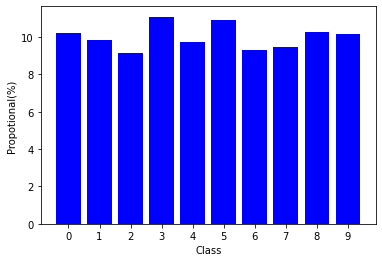

epoch 1201: train D loss: 0.6713, train F loss: -0.6054, train acc: 0.9894, domain acc: 0.5802
epoch 1202: train D loss: 0.6693, train F loss: -0.6109, train acc: 0.9912, domain acc: 0.5902
epoch 1203: train D loss: 0.6714, train F loss: -0.6162, train acc: 0.9914, domain acc: 0.5819
epoch 1204: train D loss: 0.6717, train F loss: -0.6109, train acc: 0.9908, domain acc: 0.5816
epoch 1205: train D loss: 0.6681, train F loss: -0.6127, train acc: 0.9910, domain acc: 0.5868
epoch 1206: train D loss: 0.6659, train F loss: -0.6071, train acc: 0.9906, domain acc: 0.5927
epoch 1207: train D loss: 0.6682, train F loss: -0.6102, train acc: 0.9908, domain acc: 0.5872
epoch 1208: train D loss: 0.6713, train F loss: -0.6151, train acc: 0.9912, domain acc: 0.5825
epoch 1209: train D loss: 0.6704, train F loss: -0.6113, train acc: 0.9904, domain acc: 0.5843
epoch 1210: train D loss: 0.6720, train F loss: -0.6080, train acc: 0.9896, domain acc: 0.5813
epoch 1211: train D loss: 0.6758, train F loss: -0

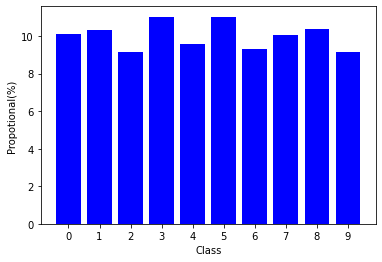

epoch 1301: train D loss: 0.6736, train F loss: -0.6185, train acc: 0.9912, domain acc: 0.5803
epoch 1302: train D loss: 0.6781, train F loss: -0.6265, train acc: 0.9896, domain acc: 0.5692
epoch 1303: train D loss: 0.6732, train F loss: -0.6205, train acc: 0.9908, domain acc: 0.5751
epoch 1304: train D loss: 0.6743, train F loss: -0.6211, train acc: 0.9920, domain acc: 0.5745
epoch 1305: train D loss: 0.6705, train F loss: -0.6203, train acc: 0.9902, domain acc: 0.5772
epoch 1306: train D loss: 0.6704, train F loss: -0.6233, train acc: 0.9922, domain acc: 0.5832
epoch 1307: train D loss: 0.6734, train F loss: -0.6180, train acc: 0.9908, domain acc: 0.5741
epoch 1308: train D loss: 0.6732, train F loss: -0.6141, train acc: 0.9892, domain acc: 0.5750
epoch 1309: train D loss: 0.6764, train F loss: -0.6300, train acc: 0.9914, domain acc: 0.5729
epoch 1310: train D loss: 0.6706, train F loss: -0.6201, train acc: 0.9926, domain acc: 0.5758
epoch 1311: train D loss: 0.6739, train F loss: -0

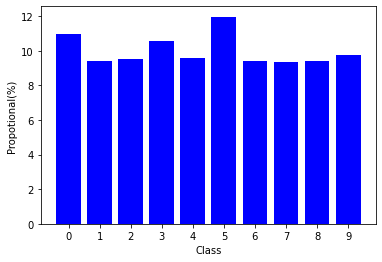

epoch 1401: train D loss: 0.6646, train F loss: -0.6144, train acc: 0.9896, domain acc: 0.5894
epoch 1402: train D loss: 0.6669, train F loss: -0.6201, train acc: 0.9918, domain acc: 0.5898
epoch 1403: train D loss: 0.6673, train F loss: -0.6224, train acc: 0.9912, domain acc: 0.5873
epoch 1404: train D loss: 0.6746, train F loss: -0.6307, train acc: 0.9924, domain acc: 0.5736
epoch 1405: train D loss: 0.6660, train F loss: -0.6223, train acc: 0.9924, domain acc: 0.5920
epoch 1406: train D loss: 0.6666, train F loss: -0.6184, train acc: 0.9924, domain acc: 0.5881
epoch 1407: train D loss: 0.6680, train F loss: -0.6183, train acc: 0.9902, domain acc: 0.5909
epoch 1408: train D loss: 0.6717, train F loss: -0.6255, train acc: 0.9914, domain acc: 0.5883
epoch 1409: train D loss: 0.6732, train F loss: -0.6288, train acc: 0.9910, domain acc: 0.5788
epoch 1410: train D loss: 0.6703, train F loss: -0.6215, train acc: 0.9896, domain acc: 0.5841
epoch 1411: train D loss: 0.6681, train F loss: -0

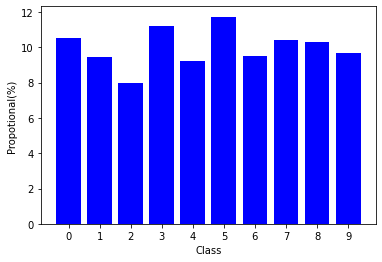

epoch 1501: train D loss: 0.6770, train F loss: -0.6247, train acc: 0.9892, domain acc: 0.5713
epoch 1502: train D loss: 0.6772, train F loss: -0.6429, train acc: 0.9944, domain acc: 0.5745
epoch 1503: train D loss: 0.6733, train F loss: -0.6273, train acc: 0.9914, domain acc: 0.5795
epoch 1504: train D loss: 0.6768, train F loss: -0.6367, train acc: 0.9920, domain acc: 0.5699
epoch 1505: train D loss: 0.6785, train F loss: -0.6387, train acc: 0.9916, domain acc: 0.5637
epoch 1506: train D loss: 0.6735, train F loss: -0.6367, train acc: 0.9926, domain acc: 0.5776
epoch 1507: train D loss: 0.6743, train F loss: -0.6360, train acc: 0.9940, domain acc: 0.5819
epoch 1508: train D loss: 0.6732, train F loss: -0.6161, train acc: 0.9886, domain acc: 0.5786
epoch 1509: train D loss: 0.6775, train F loss: -0.6395, train acc: 0.9904, domain acc: 0.5678
epoch 1510: train D loss: 0.6744, train F loss: -0.6362, train acc: 0.9930, domain acc: 0.5738
epoch 1511: train D loss: 0.6737, train F loss: -0

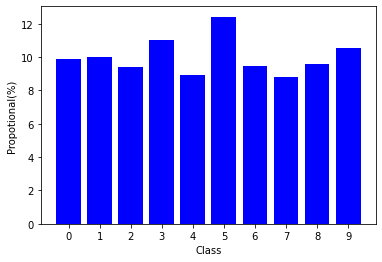

epoch 1601: train D loss: 0.6743, train F loss: -0.6405, train acc: 0.9924, domain acc: 0.5722
epoch 1602: train D loss: 0.6739, train F loss: -0.6448, train acc: 0.9944, domain acc: 0.5717
epoch 1603: train D loss: 0.6778, train F loss: -0.6400, train acc: 0.9920, domain acc: 0.5696
epoch 1604: train D loss: 0.6757, train F loss: -0.6385, train acc: 0.9918, domain acc: 0.5679
epoch 1605: train D loss: 0.6753, train F loss: -0.6404, train acc: 0.9926, domain acc: 0.5753
epoch 1606: train D loss: 0.6704, train F loss: -0.6131, train acc: 0.9912, domain acc: 0.5853
epoch 1607: train D loss: 0.6755, train F loss: -0.6429, train acc: 0.9932, domain acc: 0.5734
epoch 1608: train D loss: 0.6754, train F loss: -0.6393, train acc: 0.9918, domain acc: 0.5688
epoch 1609: train D loss: 0.6712, train F loss: -0.6299, train acc: 0.9922, domain acc: 0.5855
epoch 1610: train D loss: 0.6755, train F loss: -0.6171, train acc: 0.9894, domain acc: 0.5753
epoch 1611: train D loss: 0.6722, train F loss: -0

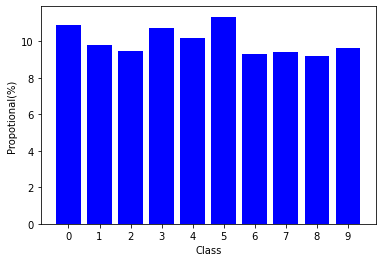

epoch 1701: train D loss: 0.6722, train F loss: -0.6396, train acc: 0.9944, domain acc: 0.5761
epoch 1702: train D loss: 0.6718, train F loss: -0.6361, train acc: 0.9928, domain acc: 0.5753
epoch 1703: train D loss: 0.6803, train F loss: -0.6485, train acc: 0.9934, domain acc: 0.5602
epoch 1704: train D loss: 0.6761, train F loss: -0.6464, train acc: 0.9934, domain acc: 0.5710
epoch 1705: train D loss: 0.6756, train F loss: -0.6274, train acc: 0.9908, domain acc: 0.5704
epoch 1706: train D loss: 0.6733, train F loss: -0.6358, train acc: 0.9924, domain acc: 0.5764
epoch 1707: train D loss: 0.6710, train F loss: -0.6383, train acc: 0.9928, domain acc: 0.5794
epoch 1708: train D loss: 0.6784, train F loss: -0.6438, train acc: 0.9920, domain acc: 0.5668
epoch 1709: train D loss: 0.6750, train F loss: -0.6338, train acc: 0.9910, domain acc: 0.5724
epoch 1710: train D loss: 0.6738, train F loss: -0.6430, train acc: 0.9942, domain acc: 0.5758
epoch 1711: train D loss: 0.6797, train F loss: -0

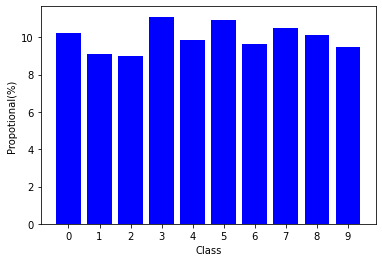

epoch 1801: train D loss: 0.6778, train F loss: -0.6438, train acc: 0.9914, domain acc: 0.5655
epoch 1802: train D loss: 0.6766, train F loss: -0.6470, train acc: 0.9932, domain acc: 0.5656
epoch 1803: train D loss: 0.6776, train F loss: -0.6504, train acc: 0.9928, domain acc: 0.5605
epoch 1804: train D loss: 0.6736, train F loss: -0.6367, train acc: 0.9924, domain acc: 0.5735
epoch 1805: train D loss: 0.6707, train F loss: -0.6343, train acc: 0.9924, domain acc: 0.5776
epoch 1806: train D loss: 0.6766, train F loss: -0.6438, train acc: 0.9916, domain acc: 0.5771
epoch 1807: train D loss: 0.6752, train F loss: -0.6450, train acc: 0.9932, domain acc: 0.5704
epoch 1808: train D loss: 0.6718, train F loss: -0.6440, train acc: 0.9940, domain acc: 0.5773
epoch 1809: train D loss: 0.6778, train F loss: -0.6448, train acc: 0.9918, domain acc: 0.5655
epoch 1810: train D loss: 0.6771, train F loss: -0.6437, train acc: 0.9914, domain acc: 0.5694
epoch 1811: train D loss: 0.6779, train F loss: -0

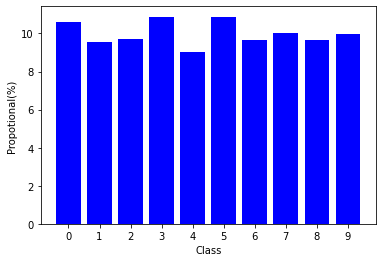

epoch 1901: train D loss: 0.6792, train F loss: -0.6500, train acc: 0.9928, domain acc: 0.5647
epoch 1902: train D loss: 0.6748, train F loss: -0.6491, train acc: 0.9936, domain acc: 0.5655
epoch 1903: train D loss: 0.6796, train F loss: -0.6447, train acc: 0.9920, domain acc: 0.5666
epoch 1904: train D loss: 0.6765, train F loss: -0.6503, train acc: 0.9934, domain acc: 0.5721
epoch 1905: train D loss: 0.6758, train F loss: -0.6453, train acc: 0.9928, domain acc: 0.5702
epoch 1906: train D loss: 0.6768, train F loss: -0.6423, train acc: 0.9928, domain acc: 0.5661
epoch 1907: train D loss: 0.6762, train F loss: -0.6424, train acc: 0.9916, domain acc: 0.5711
epoch 1908: train D loss: 0.6752, train F loss: -0.6440, train acc: 0.9918, domain acc: 0.5702
epoch 1909: train D loss: 0.6799, train F loss: -0.6496, train acc: 0.9924, domain acc: 0.5623
epoch 1910: train D loss: 0.6786, train F loss: -0.6488, train acc: 0.9924, domain acc: 0.5691
epoch 1911: train D loss: 0.6769, train F loss: -0

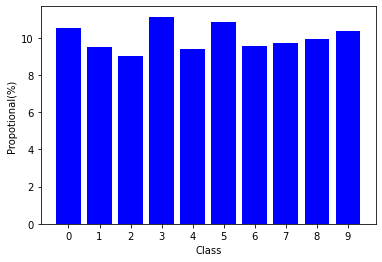

epoch 2001: train D loss: 0.6658, train F loss: -0.6295, train acc: 0.9928, domain acc: 0.5886
epoch 2002: train D loss: 0.6645, train F loss: -0.6334, train acc: 0.9922, domain acc: 0.5935
epoch 2003: train D loss: 0.6653, train F loss: -0.6371, train acc: 0.9946, domain acc: 0.5860
epoch 2004: train D loss: 0.6721, train F loss: -0.6392, train acc: 0.9916, domain acc: 0.5824
epoch 2005: train D loss: 0.6718, train F loss: -0.6399, train acc: 0.9914, domain acc: 0.5762
epoch 2006: train D loss: 0.6767, train F loss: -0.6486, train acc: 0.9936, domain acc: 0.5672
epoch 2007: train D loss: 0.6760, train F loss: -0.6460, train acc: 0.9932, domain acc: 0.5705
epoch 2008: train D loss: 0.6765, train F loss: -0.6464, train acc: 0.9930, domain acc: 0.5606
epoch 2009: train D loss: 0.6738, train F loss: -0.6451, train acc: 0.9936, domain acc: 0.5806
epoch 2010: train D loss: 0.6726, train F loss: -0.6413, train acc: 0.9934, domain acc: 0.5777
epoch 2011: train D loss: 0.6688, train F loss: -0

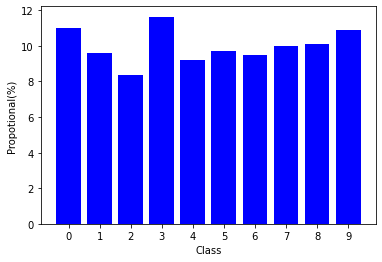

epoch 2101: train D loss: 0.6729, train F loss: -0.5958, train acc: 0.9892, domain acc: 0.5742
epoch 2102: train D loss: 0.6710, train F loss: -0.6318, train acc: 0.9930, domain acc: 0.5797
epoch 2103: train D loss: 0.6705, train F loss: -0.6407, train acc: 0.9922, domain acc: 0.5869
epoch 2104: train D loss: 0.6740, train F loss: -0.6406, train acc: 0.9920, domain acc: 0.5736
epoch 2105: train D loss: 0.6704, train F loss: -0.6363, train acc: 0.9926, domain acc: 0.5824
epoch 2106: train D loss: 0.6765, train F loss: -0.6428, train acc: 0.9924, domain acc: 0.5671
epoch 2107: train D loss: 0.6729, train F loss: -0.6347, train acc: 0.9908, domain acc: 0.5738
epoch 2108: train D loss: 0.6780, train F loss: -0.6483, train acc: 0.9920, domain acc: 0.5661
epoch 2109: train D loss: 0.6727, train F loss: -0.6463, train acc: 0.9932, domain acc: 0.5798
epoch 2110: train D loss: 0.6751, train F loss: -0.6502, train acc: 0.9948, domain acc: 0.5698
epoch 2111: train D loss: 0.6754, train F loss: -0

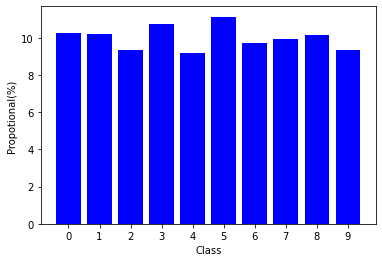

epoch 2201: train D loss: 0.6761, train F loss: -0.6511, train acc: 0.9942, domain acc: 0.5625
epoch 2202: train D loss: 0.6778, train F loss: -0.6548, train acc: 0.9952, domain acc: 0.5608
epoch 2203: train D loss: 0.6771, train F loss: -0.6472, train acc: 0.9924, domain acc: 0.5755
epoch 2204: train D loss: 0.6803, train F loss: -0.6541, train acc: 0.9936, domain acc: 0.5630
epoch 2205: train D loss: 0.6796, train F loss: -0.6549, train acc: 0.9946, domain acc: 0.5660
epoch 2206: train D loss: 0.6825, train F loss: -0.6355, train acc: 0.9912, domain acc: 0.5577
epoch 2207: train D loss: 0.6781, train F loss: -0.6505, train acc: 0.9934, domain acc: 0.5643
epoch 2208: train D loss: 0.6732, train F loss: -0.6439, train acc: 0.9910, domain acc: 0.5721
epoch 2209: train D loss: 0.6749, train F loss: -0.6538, train acc: 0.9952, domain acc: 0.5756
epoch 2210: train D loss: 0.6787, train F loss: -0.6519, train acc: 0.9938, domain acc: 0.5650
epoch 2211: train D loss: 0.6775, train F loss: -0

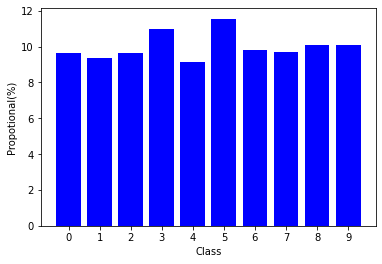

epoch 2301: train D loss: 0.6793, train F loss: -0.6445, train acc: 0.9922, domain acc: 0.5640
epoch 2302: train D loss: 0.6748, train F loss: -0.6369, train acc: 0.9904, domain acc: 0.5745
epoch 2303: train D loss: 0.6800, train F loss: -0.6336, train acc: 0.9902, domain acc: 0.5581
epoch 2304: train D loss: 0.6759, train F loss: -0.6474, train acc: 0.9930, domain acc: 0.5701
epoch 2305: train D loss: 0.6750, train F loss: -0.6504, train acc: 0.9932, domain acc: 0.5719
epoch 2306: train D loss: 0.6749, train F loss: -0.6463, train acc: 0.9926, domain acc: 0.5789
epoch 2307: train D loss: 0.6792, train F loss: -0.6499, train acc: 0.9924, domain acc: 0.5641
epoch 2308: train D loss: 0.6813, train F loss: -0.6368, train acc: 0.9926, domain acc: 0.5621
epoch 2309: train D loss: 0.6758, train F loss: -0.6555, train acc: 0.9958, domain acc: 0.5749
epoch 2310: train D loss: 0.6755, train F loss: -0.6497, train acc: 0.9942, domain acc: 0.5706
epoch 2311: train D loss: 0.6749, train F loss: -0

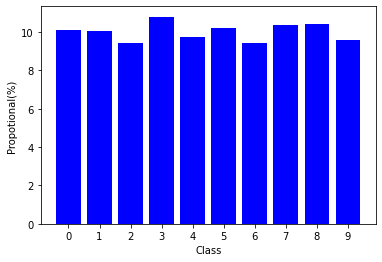

epoch 2401: train D loss: 0.6757, train F loss: -0.6571, train acc: 0.9948, domain acc: 0.5698
epoch 2402: train D loss: 0.6755, train F loss: -0.6476, train acc: 0.9920, domain acc: 0.5763
epoch 2403: train D loss: 0.6774, train F loss: -0.6495, train acc: 0.9936, domain acc: 0.5667
epoch 2404: train D loss: 0.6802, train F loss: -0.6558, train acc: 0.9932, domain acc: 0.5665
epoch 2405: train D loss: 0.6805, train F loss: -0.6504, train acc: 0.9916, domain acc: 0.5639
epoch 2406: train D loss: 0.6776, train F loss: -0.6461, train acc: 0.9928, domain acc: 0.5694
epoch 2407: train D loss: 0.6754, train F loss: -0.6421, train acc: 0.9922, domain acc: 0.5678
epoch 2408: train D loss: 0.6765, train F loss: -0.6453, train acc: 0.9912, domain acc: 0.5700
epoch 2409: train D loss: 0.6723, train F loss: -0.6481, train acc: 0.9948, domain acc: 0.5803
epoch 2410: train D loss: 0.6768, train F loss: -0.6544, train acc: 0.9954, domain acc: 0.5656
epoch 2411: train D loss: 0.6762, train F loss: -0

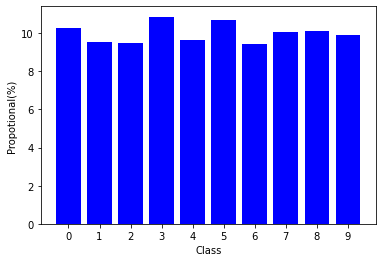

epoch 2501: train D loss: 0.6762, train F loss: -0.6525, train acc: 0.9934, domain acc: 0.5698
epoch 2502: train D loss: 0.6757, train F loss: -0.6564, train acc: 0.9952, domain acc: 0.5679
epoch 2503: train D loss: 0.6779, train F loss: -0.6571, train acc: 0.9940, domain acc: 0.5672
epoch 2504: train D loss: 0.6763, train F loss: -0.6475, train acc: 0.9928, domain acc: 0.5686
epoch 2505: train D loss: 0.6790, train F loss: -0.6576, train acc: 0.9942, domain acc: 0.5614
epoch 2506: train D loss: 0.6802, train F loss: -0.6617, train acc: 0.9956, domain acc: 0.5596
epoch 2507: train D loss: 0.6785, train F loss: -0.6529, train acc: 0.9938, domain acc: 0.5655
epoch 2508: train D loss: 0.6819, train F loss: -0.6468, train acc: 0.9908, domain acc: 0.5540
epoch 2509: train D loss: 0.6795, train F loss: -0.6600, train acc: 0.9950, domain acc: 0.5629
epoch 2510: train D loss: 0.6814, train F loss: -0.6468, train acc: 0.9916, domain acc: 0.5550
epoch 2511: train D loss: 0.6763, train F loss: -0

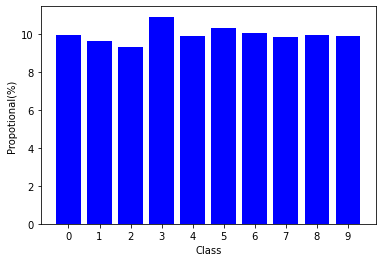

epoch 2601: train D loss: 0.6786, train F loss: -0.6556, train acc: 0.9946, domain acc: 0.5631
epoch 2602: train D loss: 0.6802, train F loss: -0.6529, train acc: 0.9930, domain acc: 0.5616
epoch 2603: train D loss: 0.6757, train F loss: -0.6489, train acc: 0.9930, domain acc: 0.5709
epoch 2604: train D loss: 0.6785, train F loss: -0.6511, train acc: 0.9924, domain acc: 0.5666
epoch 2605: train D loss: 0.6750, train F loss: -0.6506, train acc: 0.9942, domain acc: 0.5686
epoch 2606: train D loss: 0.6825, train F loss: -0.6629, train acc: 0.9942, domain acc: 0.5485
epoch 2607: train D loss: 0.6803, train F loss: -0.6590, train acc: 0.9942, domain acc: 0.5591
epoch 2608: train D loss: 0.6846, train F loss: -0.6446, train acc: 0.9906, domain acc: 0.5495
epoch 2609: train D loss: 0.6818, train F loss: -0.6570, train acc: 0.9932, domain acc: 0.5644
epoch 2610: train D loss: 0.6798, train F loss: -0.6534, train acc: 0.9918, domain acc: 0.5551
epoch 2611: train D loss: 0.6754, train F loss: -0

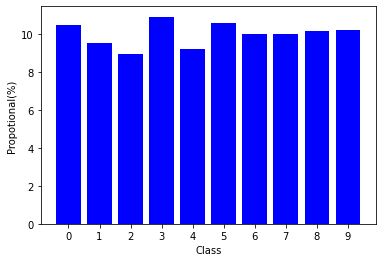

epoch 2701: train D loss: 0.6764, train F loss: -0.6489, train acc: 0.9930, domain acc: 0.5653
epoch 2702: train D loss: 0.6800, train F loss: -0.6580, train acc: 0.9930, domain acc: 0.5586
epoch 2703: train D loss: 0.6769, train F loss: -0.6447, train acc: 0.9918, domain acc: 0.5643
epoch 2704: train D loss: 0.6751, train F loss: -0.6283, train acc: 0.9940, domain acc: 0.5699
epoch 2705: train D loss: 0.6768, train F loss: -0.6485, train acc: 0.9930, domain acc: 0.5699
epoch 2706: train D loss: 0.6727, train F loss: -0.6455, train acc: 0.9940, domain acc: 0.5767
epoch 2707: train D loss: 0.6762, train F loss: -0.6532, train acc: 0.9948, domain acc: 0.5659
epoch 2708: train D loss: 0.6794, train F loss: -0.6466, train acc: 0.9926, domain acc: 0.5651
epoch 2709: train D loss: 0.6788, train F loss: -0.6559, train acc: 0.9930, domain acc: 0.5638
epoch 2710: train D loss: 0.6772, train F loss: -0.6521, train acc: 0.9942, domain acc: 0.5651
epoch 2711: train D loss: 0.6832, train F loss: -0

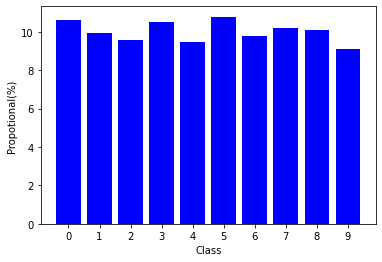

epoch 2801: train D loss: 0.6789, train F loss: -0.6541, train acc: 0.9936, domain acc: 0.5626
epoch 2802: train D loss: 0.6785, train F loss: -0.6518, train acc: 0.9932, domain acc: 0.5604
epoch 2803: train D loss: 0.6790, train F loss: -0.6551, train acc: 0.9934, domain acc: 0.5615
epoch 2804: train D loss: 0.6779, train F loss: -0.6549, train acc: 0.9940, domain acc: 0.5683
epoch 2805: train D loss: 0.6822, train F loss: -0.6637, train acc: 0.9950, domain acc: 0.5527
epoch 2806: train D loss: 0.6791, train F loss: -0.6544, train acc: 0.9928, domain acc: 0.5620
epoch 2807: train D loss: 0.6801, train F loss: -0.6569, train acc: 0.9944, domain acc: 0.5602
epoch 2808: train D loss: 0.6758, train F loss: -0.6471, train acc: 0.9918, domain acc: 0.5696
epoch 2809: train D loss: 0.6791, train F loss: -0.6455, train acc: 0.9930, domain acc: 0.5617
epoch 2810: train D loss: 0.6785, train F loss: -0.6574, train acc: 0.9948, domain acc: 0.5621
epoch 2811: train D loss: 0.6818, train F loss: -0

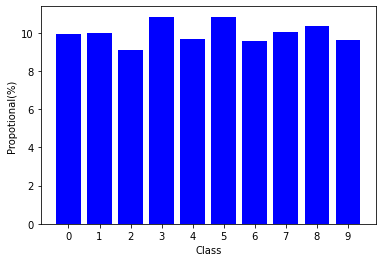

epoch 2901: train D loss: 0.6765, train F loss: -0.6443, train acc: 0.9920, domain acc: 0.5671
epoch 2902: train D loss: 0.6781, train F loss: -0.6524, train acc: 0.9936, domain acc: 0.5673
epoch 2903: train D loss: 0.6762, train F loss: -0.6542, train acc: 0.9942, domain acc: 0.5660
epoch 2904: train D loss: 0.6804, train F loss: -0.6541, train acc: 0.9940, domain acc: 0.5622
epoch 2905: train D loss: 0.6808, train F loss: -0.6504, train acc: 0.9916, domain acc: 0.5616
epoch 2906: train D loss: 0.6806, train F loss: -0.6586, train acc: 0.9944, domain acc: 0.5559
epoch 2907: train D loss: 0.6816, train F loss: -0.6527, train acc: 0.9940, domain acc: 0.5635
epoch 2908: train D loss: 0.6785, train F loss: -0.6560, train acc: 0.9928, domain acc: 0.5620
epoch 2909: train D loss: 0.6813, train F loss: -0.6495, train acc: 0.9908, domain acc: 0.5556
epoch 2910: train D loss: 0.6808, train F loss: -0.6592, train acc: 0.9946, domain acc: 0.5545
epoch 2911: train D loss: 0.6803, train F loss: -0

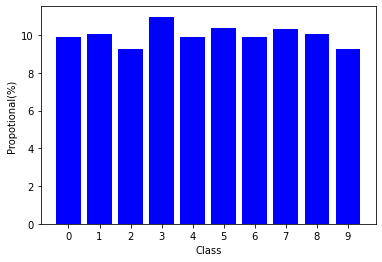

In [13]:
best_std = np.inf

for epoch in range(total_epochs):
    label_predictor.train()
    feature_extractor.train()

    lamb = get_lambda(epoch+1, total_epochs)
    train_D_loss, train_F_loss, train_acc, domain_acc = train_epoch(source_dataloader, target_dataloader, lamb=lamb)

    checkpoints['Epoch'].append(epoch)
    checkpoints['lambda'].append(lamb)
    checkpoints['Training Accuracy'].append(train_acc)
    checkpoints['Domain Training Accuracy'].append(domain_acc)
    checkpoints['Extractor Loss'].append(train_F_loss)
    checkpoints['Domain Classifier Loss'].append(train_D_loss)

    print('epoch {:>3d}: train D loss: {:6.4f}, train F loss: {:6.4f}, train acc: {:6.4f}, domain acc: {:6.4f}'.format(
        epoch+1, train_D_loss, train_F_loss, train_acc, domain_acc
        ))

    if epoch+1 == early_stage_epoch:
        torch.save(feature_extractor.state_dict(), os.path.join(model_dir, f"extractor_model_early.pt"))
        torch.save(label_predictor.state_dict(), os.path.join(model_dir, f"predictor_model_early.pt"))
    elif epoch+1 == middle_stage_epoch:
        torch.save(feature_extractor.state_dict(), os.path.join(model_dir, f"extractor_model_middle.pt"))
        torch.save(label_predictor.state_dict(), os.path.join(model_dir, f"predictor_model_middle.pt"))
    elif epoch+1 == final_stage_epoch:
        torch.save(feature_extractor.state_dict(), os.path.join(model_dir, f"extractor_model_final.pt"))
        torch.save(label_predictor.state_dict(), os.path.join(model_dir, f"predictor_model_final.pt"))
    
    # # Save the model each 500 epochs
    # if (epoch+1) % n_save == 0:
    #     torch.save(feature_extractor.state_dict(), os.path.join(model_dir, f"extractor_model_{epoch+1}.pt"))
    #     torch.save(label_predictor.state_dict(), os.path.join(model_dir, f"predictor_model_{epoch+1}.pt"))

    # Use test dataloader to estimate the balance
    if (epoch+1) % n_balanced == 0:
        result = []
        label_predictor.eval()
        feature_extractor.eval()
        for i, (test_data, _) in enumerate(test_dataloader):
            test_data = test_data.to(device)

            class_logits = label_predictor(feature_extractor(test_data))

            x = torch.argmax(class_logits, dim=1).cpu().detach().numpy()
            result.append(x)

        result = np.concatenate(result)

        std, class_distribution = is_balanced(result)
        print(std, class_distribution)
        bar_plot(class_distribution)

        if std < best_std:
            torch.save(feature_extractor.state_dict(), os.path.join(model_dir, f"extractor_model_std.pt"))
            torch.save(label_predictor.state_dict(), os.path.join(model_dir, f"predictor_model_std.pt"))
            best_std = std

    torch.save(feature_extractor.state_dict(), extractor_path)
    torch.save(label_predictor.state_dict(), predictor_path)

# Training Statistics

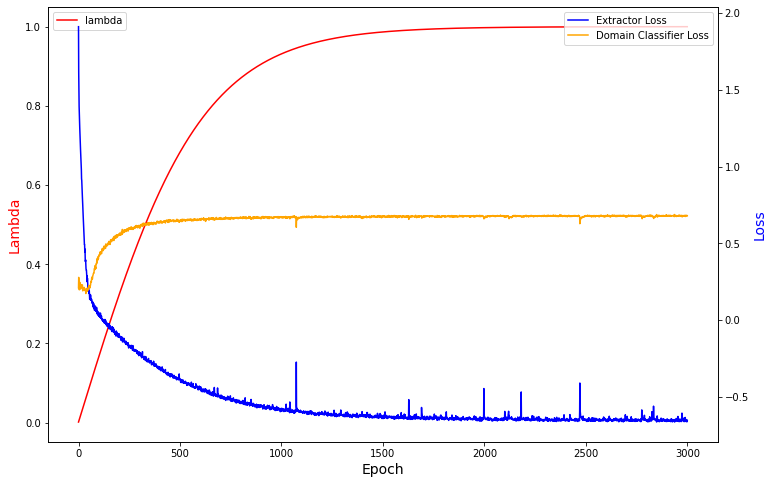

In [14]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(12, 8))
# make a plot
ax.plot(checkpoints["Epoch"], checkpoints["lambda"], color="red", label="lambda")
# set x-axis label
ax.set_xlabel("Epoch", fontsize=14)
# set y-axis label
ax.set_ylabel("Lambda", color="red", fontsize=14)
# Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(checkpoints["Epoch"], checkpoints["Extractor Loss"], color="blue", label="Extractor Loss")
ax2.plot(checkpoints["Epoch"], checkpoints["Domain Classifier Loss"], color="orange", label="Domain Classifier Loss")
ax2.set_ylabel("Loss", color="blue", fontsize=14)
ax.legend(), ax2.legend()
plt.show()

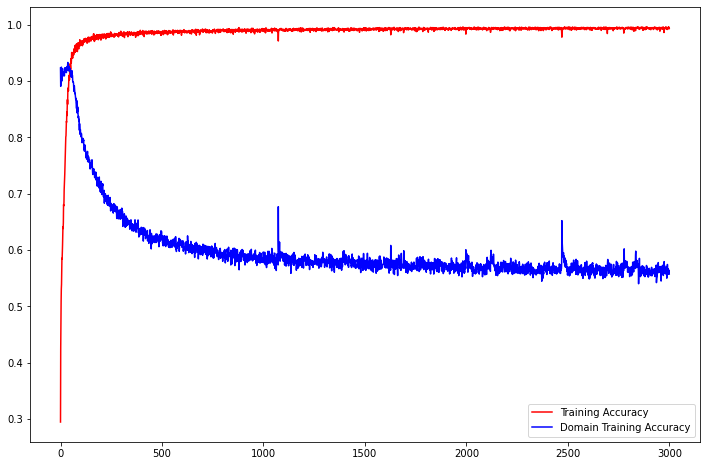

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(checkpoints["Epoch"], checkpoints["Training Accuracy"], color="red", label="Training Accuracy")
plt.plot(checkpoints["Epoch"], checkpoints["Domain Training Accuracy"], color="blue", label="Domain Training Accuracy")
plt.legend()
plt.show()

# Inference

We use pandas to generate our csv file.

BTW, the performance of the model trained for 200 epoches might be unstable. You can train for more epoches for a more stable performance.

In [16]:
def same_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

[88421950 49995955 59839857 18036127 88056735 33405408 25395201 74065649
 92523427 15126727 20359907 17709916 34443508 84664321 43052468  6245956
 93683631 32382792 58433446 78343408]
0.4717512056158416 {0: 9.84, 1: 10.012, 2: 9.254999999999999, 3: 10.991, 4: 9.893, 5: 10.388, 6: 9.888, 7: 10.299999999999999, 8: 10.061, 9: 9.372}
0.4750549441906694 {0: 9.998999999999999, 1: 10.006, 2: 9.254, 3: 10.974, 4: 9.883000000000001, 5: 10.388, 6: 9.927999999999999, 7: 10.253, 8: 10.034, 9: 9.281}
0.4633922744284806 {0: 9.985, 1: 10.073, 2: 9.26, 3: 10.956000000000001, 4: 9.958, 5: 10.38, 6: 9.959999999999999, 7: 10.122, 8: 10.025, 9: 9.281}
0.45723363830759456 {0: 9.940999999999999, 1: 10.008000000000001, 2: 9.269, 3: 10.945, 4: 9.92, 5: 10.353, 6: 9.925, 7: 10.256, 8: 10.057, 9: 9.325999999999999}
0.4589934640057521 {0: 9.966999999999999, 1: 10.001999999999999, 2: 9.241000000000001, 3: 10.95, 4: 9.937, 5: 10.324, 6: 9.951, 7: 10.215, 8: 10.091999999999999, 9: 9.321}
0.47455916385630964 {0: 9.8

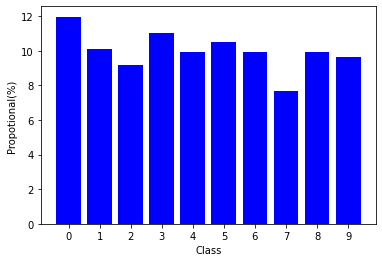

In [17]:
import pandas as pd
result = []

ensemble_dir = f"./ensemble"
if not os.path.exists(ensemble_dir):
    os.makedirs(ensemble_dir)

# extractor_path = os.path.join(model_dir, f"extractor_model.pt")
# predictor_path = os.path.join(model_dir, f"predictor_model.pt")
feature_extractor.load_state_dict(torch.load(extractor_path))
label_predictor.load_state_dict(torch.load(predictor_path))
feature_extractor.eval()
label_predictor.eval()

# # Random seeds
# seeds = np.random.randint(0, 99999999, size=20)

# My seeds
seeds = [
    88421950, 49995955, 59839857, 18036127, 88056735, 33405408, 25395201, 74065649,
    92523427, 15126727, 20359907, 17709916, 34443508, 84664321, 43052468,  6245956,
    93683631, 32382792, 58433446, 78343408
]
print(seeds)
ensemble_results = []
for seed in seeds:
    result = []
    same_seeds(seed)
    for i, (test_data, _) in enumerate(test_dataloader):
        test_data = test_data.to(device)

        class_logits = label_predictor(feature_extractor(test_data))

        # x = torch.argmax(class_logits, dim=1).cpu().detach().numpy()
        result.append(class_logits.cpu().detach().numpy())

    result = np.concatenate(result)
    ensemble_results.append(result)
    result = np.argmax(result, axis=1)

    std, class_distribution = is_balanced(result)
    print(std, class_distribution)
    # bar_plot(class_distribution)

    # Generate your submission
    df = pd.DataFrame({'id': np.arange(0, len(result)), 'label': result})
    df.to_csv(os.path.join(ensemble_dir, f'seed-{seed}.csv'), index=False)

ensemble_results = np.argmax(np.array(ensemble_results).mean(axis=0), axis=1)
std, class_distribution = is_balanced(ensemble_results)
print(std, class_distribution)
bar_plot(class_distribution)

# Generate your submission
df = pd.DataFrame({'id': np.arange(0, len(ensemble_results)), 'label': ensemble_results})
df.to_csv(os.path.join(ensemble_dir, f'ensemble.csv'), index=False)

# Visualization
We use t-SNE plot to observe the distribution of extracted features.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

## Report Q1

## Step1: Load checkpoint and evaluate to get extracted features

In [19]:
# Hints:
# Set features_extractor to eval mode
# Start evaluation and collect features and labels
three_stage = {
    'early': [torch.tensor([]), torch.tensor([]), None],
    'middle': [torch.tensor([]), torch.tensor([]), None],
    'final': [torch.tensor([]), torch.tensor([]), None],
}

# X, Y = torch.tensor([]), torch.tensor([])

for key, (X, Y, X_norm) in three_stage.items():
    extractor_path = os.path.join(model_dir, f"extractor_model_{key}.pt")
    feature_extractor = FeatureExtractor().to(device)
    feature_extractor.load_state_dict(torch.load(extractor_path))
    feature_extractor.eval()

    for i, (source_data, source_label) in enumerate(source_dataloader):

        source_data = source_data.to(device)
        source_label = source_label.to(device)

        # Step 1 : train domain classifier
        feature = feature_extractor(source_data)
        three_stage[key][0] = torch.cat((three_stage[key][0], feature.cpu().detach()), dim=0)
        three_stage[key][1] = torch.cat((three_stage[key][1], source_label.cpu().detach()), dim=0)

    print(f"Features size: {three_stage[key][0].size()}\nLabel size: {three_stage[key][1].size()}")

Features size: torch.Size([5000, 512])
Label size: torch.Size([5000])
Features size: torch.Size([5000, 512])
Label size: torch.Size([5000])
Features size: torch.Size([5000, 512])
Label size: torch.Size([5000])


## Step2: Apply t-SNE and normalize

In [20]:
# process extracted features with t-SNE

for key, (X, Y, X_norm) in three_stage.items():
    X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X)

    # Normalization the processed features 
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    three_stage[key][2] = (X_tsne - x_min) / (x_max - x_min)

/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.807s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.939530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.631630
[t-SNE] KL divergence after 1000 iterations: 1.474967
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.599s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.168902
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.614189
[t-SNE] KL divergence after 1000 iterations: 1.526882
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.806s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.628381
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.985191
[t-SNE] KL divergence after 1000 iterations: 1.539794


## Step3: Visualization with matplotlib

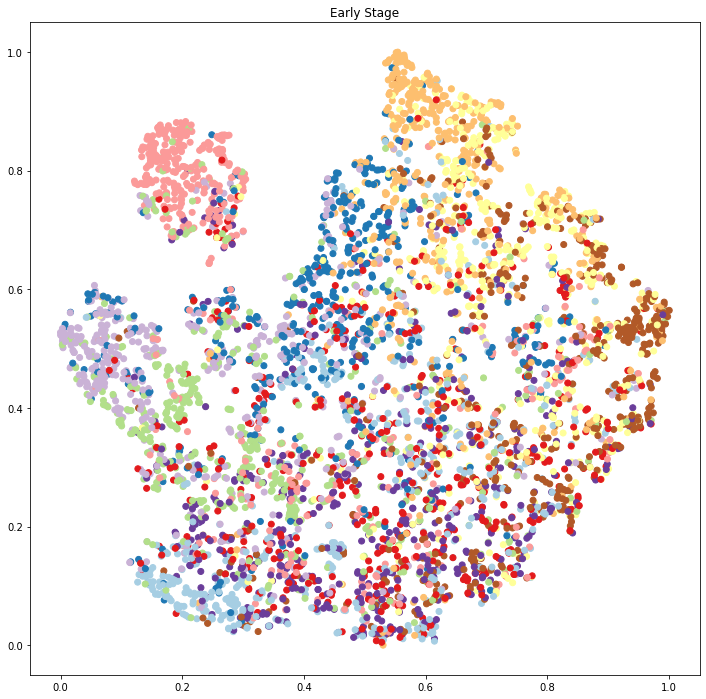

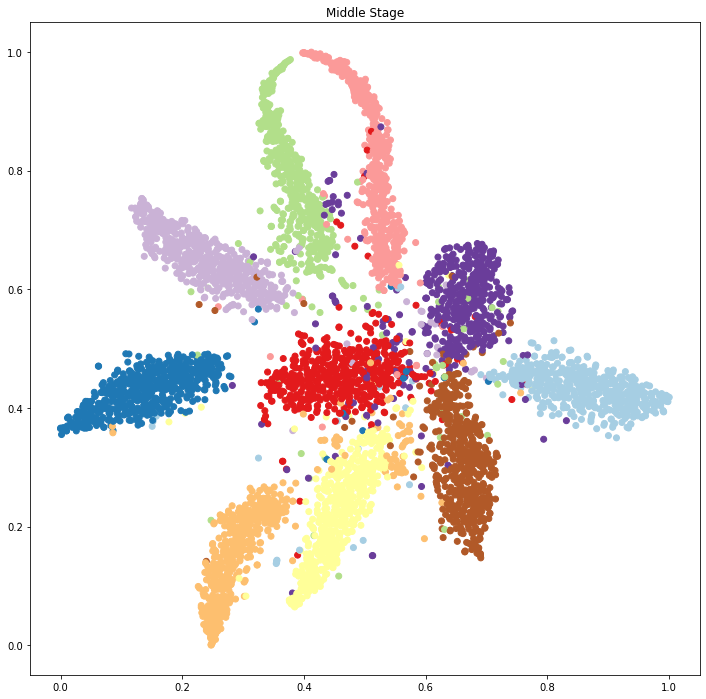

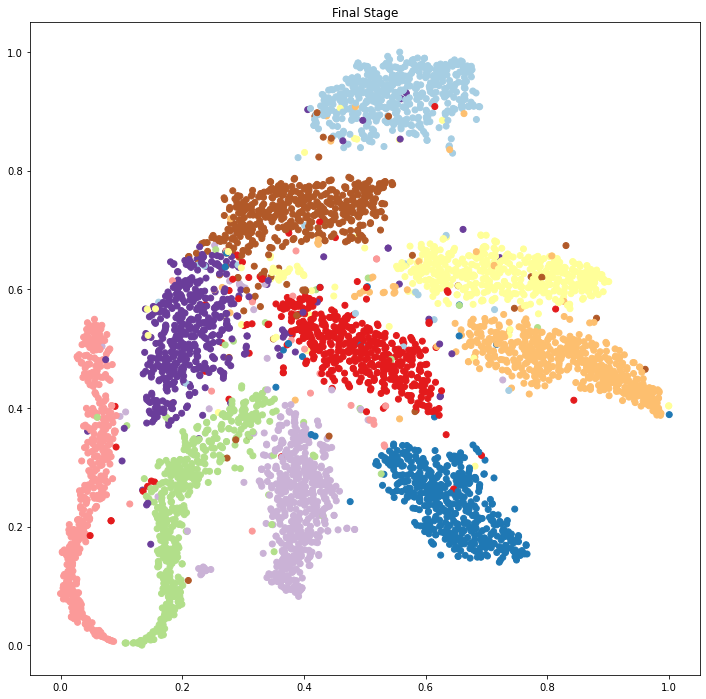

In [21]:
# Data Visualization
# Use matplotlib to plot the distribution
# The shape of X_norm is (N,2)
for key, (X, Y, X_norm) in three_stage.items():
    plt.figure(figsize=(12, 12))
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y, cmap='Paired')
    plt.title(f"{key.capitalize()} Stage")
    plt.savefig(f'Q1-{key}-stage.png')
    plt.show()
    plt.close()

## Report Q2

## Step1: Load checkpoint and evaluate to get extracted features

In [22]:
# Hints:
# Set features_extractor to eval mode
# Start evaluation and collect features and labels
three_stage = {
    'early': [torch.tensor([]), None, torch.tensor([]), None],
    'middle': [torch.tensor([]), None, torch.tensor([]), None],
    'final': [torch.tensor([]), None, torch.tensor([]), None],
}

subsampler = SubsetRandomSampler(np.random.choice(range(len(target_dataset)), 5000))
sample_loader = DataLoader(target_dataset, batch_size=32, sampler=subsampler)

for key, (X1, X1_norm, X2, X2_norm) in three_stage.items():
    extractor_path = os.path.join(model_dir, f"extractor_model_{key}.pt")
    feature_extractor = FeatureExtractor().to(device)
    feature_extractor.load_state_dict(torch.load(extractor_path))
    feature_extractor.eval()

    for i, (source_data, _) in enumerate(source_dataloader):

        source_data = source_data.to(device)

        feature = feature_extractor(source_data)
        three_stage[key][0] = torch.cat((three_stage[key][0], feature.cpu().detach()), dim=0)

    for i, (source_data, _) in enumerate(sample_loader):

        source_data = source_data.to(device)

        feature = feature_extractor(source_data)
        three_stage[key][2] = torch.cat((three_stage[key][2], feature.cpu().detach()), dim=0)

    print(f"Source size: {three_stage[key][0].size()}\nTarget size: {three_stage[key][2].size()}")

Source size: torch.Size([5000, 512])
Target size: torch.Size([5000, 512])
Source size: torch.Size([5000, 512])
Target size: torch.Size([5000, 512])
Source size: torch.Size([5000, 512])
Target size: torch.Size([5000, 512])


## Step2: Apply t-SNE and normalize

In [23]:
# process extracted features with t-SNE

for key, (X1, X1_norm, X2, X2_norm) in three_stage.items():
    X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X1)

    # Normalization the processed features 
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    three_stage[key][1] = (X_tsne - x_min) / (x_max - x_min)

    X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X2)

    # Normalization the processed features 
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    three_stage[key][3] = (X_tsne - x_min) / (x_max - x_min)

/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 0.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.927132
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.185692
[t-SNE] KL divergence after 1000 iterations: 1.454546
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.716902
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.327965
[t-SNE] KL divergence after 1000 iterations: 1.380597
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.795s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.166077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.751740
[t-SNE] KL divergence after 1000 iterations: 1.533603
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.296098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.188995
[t-SNE] KL divergence after 1000 iterations: 1.492135
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.624581
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.208389
[t-SNE] KL divergence after 1000 iterations: 1.541077
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...


/tmp3/tienyi/anaconda3/envs/MLVENV/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.614783
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.260292
[t-SNE] KL divergence after 1000 iterations: 1.536323


## Step3: Visualization with matplotlib

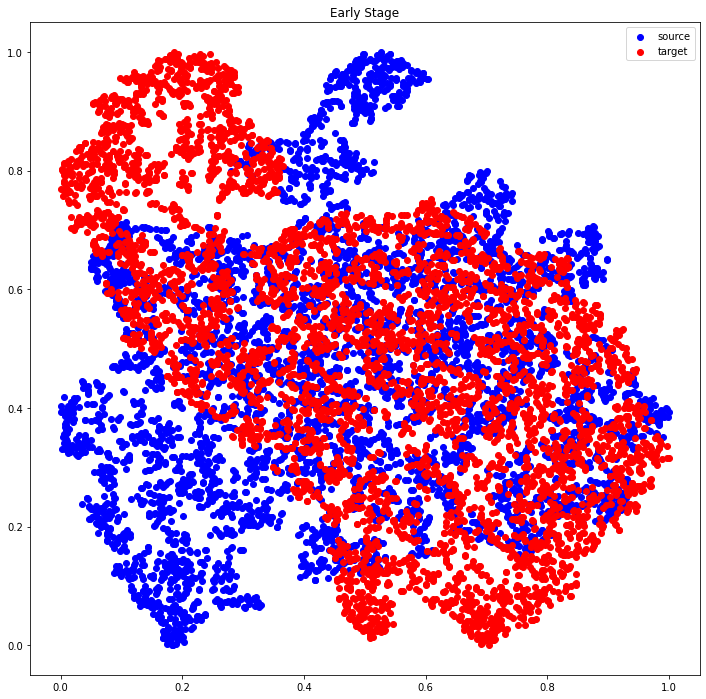

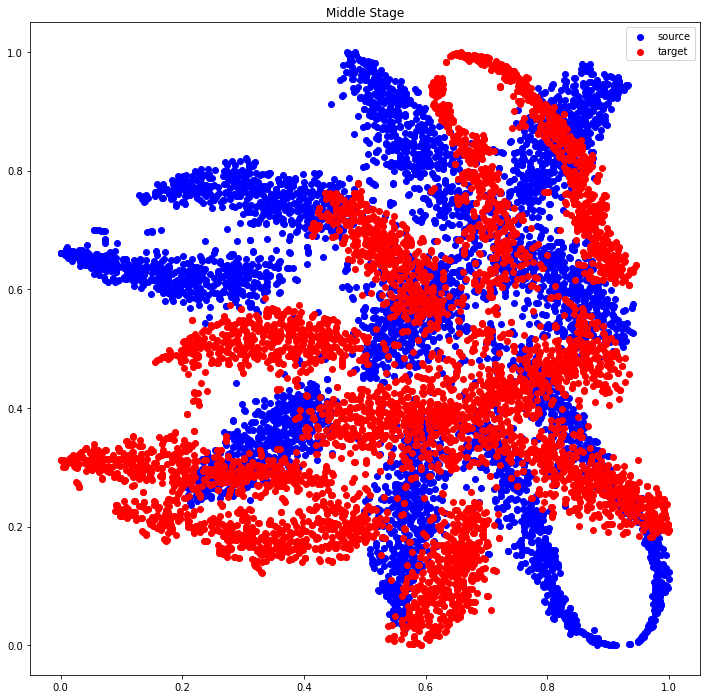

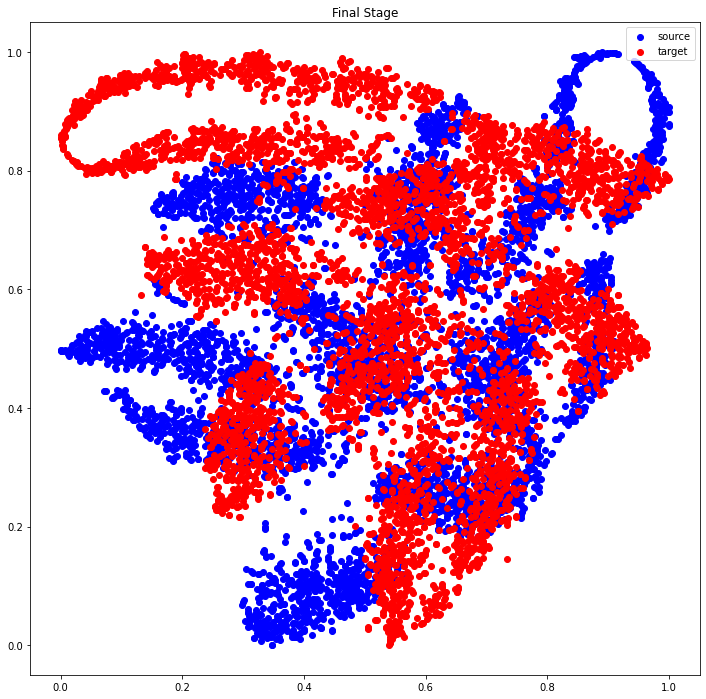

In [24]:
# Data Visualization
# Use matplotlib to plot the distribution
# The shape of X_norm is (N,2)
for key, (X1, X1_norm, X2, X2_norm) in three_stage.items():
    plt.figure(figsize=(12, 12))
    plt.scatter(X1_norm[:, 0], X1_norm[:, 1], color='blue', label='source')
    plt.scatter(X2_norm[:, 0], X2_norm[:, 1], color='red', label='target')
    plt.title(f"{key.capitalize()} Stage")
    plt.legend()
    plt.savefig(f'Q2-{key}-stage.png')
    plt.show()
    plt.close()

# Training Statistics

- Number of parameters:
  - Feature Extractor: 2, 142, 336
  - Label Predictor: 530, 442
  - Domain Classifier: 1, 055, 233

- Simple
 - Training time on colab: ~ 1 hr
- Medium
 - Training time on colab: 2 ~ 4 hr
- Strong
 - Training time on colab: 5 ~ 6 hrs
- Boss
 - **Unmeasurable**

# Learning Curve (Strong Baseline)
* This method is slightly different from colab.

![Loss Curve](https://i.imgur.com/vIujQyo.png)

# Accuracy Curve (Strong Baseline)
* Note that you cannot access testing accuracy. But this plot tells you that even though the model overfits the training data, the testing accuracy is still improving, and that's why you need to train more epochs.

![Acc Curve](https://i.imgur.com/4W1otXG.png)



# Learning Curve (Strong Baseline)
* This method is slightly different from colab.

![Loss Curve](https://i.imgur.com/vIujQyo.png)

# Accuracy Curve (Strong Baseline)
* Note that you cannot access testing accuracy. But this plot tells you that even though the model overfits the training data, the testing accuracy is still improving, and that's why you need to train more epochs.

![Acc Curve](https://i.imgur.com/4W1otXG.png)



# Q&A

If there is any problem related to Domain Adaptation, please email to b08901058@ntu.edu.tw / mlta-2022-spring@googlegroups.com。

